In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

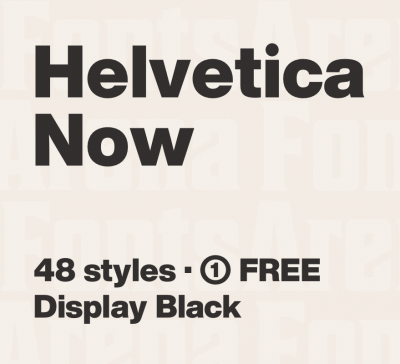

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

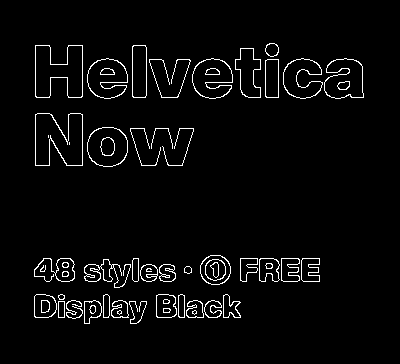

In [5]:
cv2_imshow(edges)

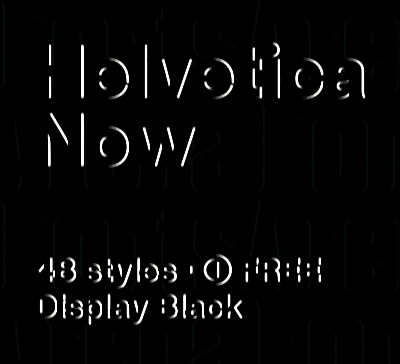

In [9]:
#VERTICAL EDGE DETECTOR

#(Source: One of Mr. Andrew Ng's video)
#What is a vertical edge - whenever a vertical edge appears in an image, there is a sharp change in pixel values 
#from one column (of pixels) to the next and thats what looks like a vertical edge to the human eye.
#Hence the kernel that detects it has completey opposite value and magnitude in one end of the column vs the other end

#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

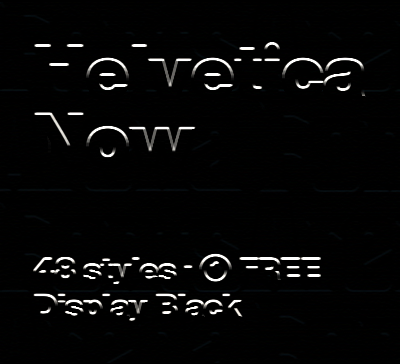

In [10]:
#HORIZONTAL EDGE DETECTOR

#What is a horizontal edge - whenever a horizontal edge appears in an image, there is a sharp change in pixel values 
#from one row (of pixels) to the next and thats what looks like a horizontal edge to the human eye.
#Hence the kernel that detects it has completey opposite value and magnitude in one end of the row vs the other end

#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

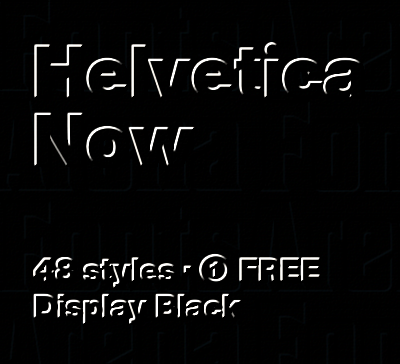

In [27]:
#45 DEGREE ANGLE DETECTOR

#What is a diagonal edge - whenever a diagonal edge appears in an image, there is a sharp change in pixel values 
#from one side (of pixels) of the diagonal to the next and thats what looks like a diagonal edge to the human eye.
#Hence the kernel that detects it has completey opposite value and magnitude in one end of the diagonal vs the other end

#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,1,0],[1,0,-1],[0,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

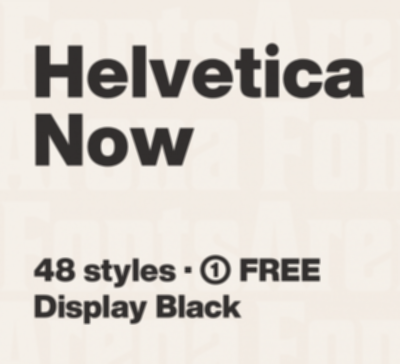

In [12]:
#BLUR KERNEL

#Lets say I have a 3x3 image that has a black dot in th middle (at 1x1th cell) and white spots all around it (the remaining cells).
#Blurring would mean whiten the black dot a bit and blacken the whites a bit.
#This intuitively means make the wholel image a bit greyish! Therefore, take the average of the black and the whites.
#Which is why this kernel looks like some sort of an average - Add up all the pixels and divide the sum by 9 (3x3)

#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

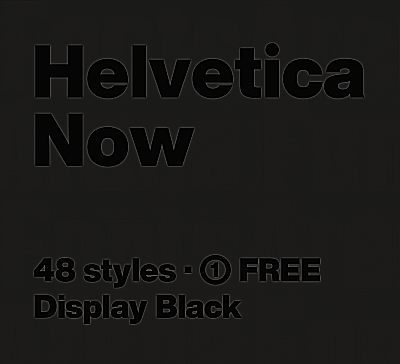

In [26]:
#SHARPEN KERNEL

#This I did not understand. I am not yet sure what sharpen actually means!!
#I just copy pasted the answer from here (A high pass filter???!!!):
#http://northstar-www.dartmouth.edu/doc/idl/html_6.2/Sharpening_an_Image.html

#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1/9,-1/9,-1/9],[-1/9,1,-1/9],[-1/9,-1/9,-1/9]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

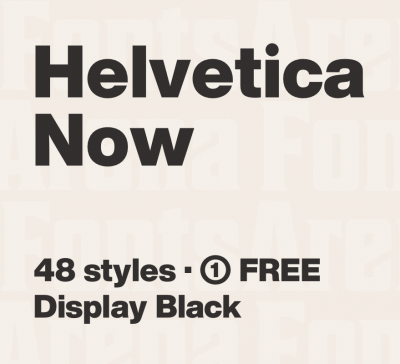

In [15]:
#IDENTITY KERNEL

#The kernel with 1 in the middle and 0 everywhere around it, makes sure that the EVERY pixel value in the image 
#(except for the outermost border along the four side) are exactly transferred to the output and hence the image pretty much looks
#exactly the same even after the convolution.
#If we wanted the output image to be EXACTLY to be the same, we could have zero-padded the original image before convolution

#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)